In [16]:
import cartopy.crs as ccrs

from cartopy.io.img_tiles import GoogleTiles

import matplotlib.pyplot as plt

import CalculatedFieldSubroutines as cfs

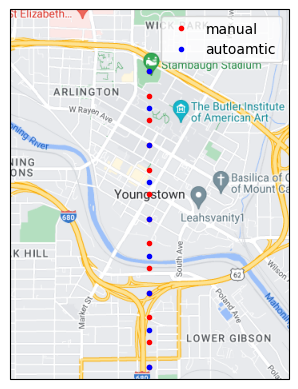

In [15]:
plt.figure( figure = ( 8, 8 ) )

#

minLat = 41.0998 - 0.01

maxLat = 41.0998 + 0.01

minLon = -80.6495 - 0.01

maxLon = -80.6495 + 0.01

expansion_coeff = 0.005

#

street_map = GoogleTiles( style = 'street' )

ax = plt.axes( projection = street_map.crs )

#

ax.set_extent( [ minLon - expansion_coeff , maxLon + expansion_coeff, minLat - expansion_coeff, maxLat + expansion_coeff ], ccrs.PlateCarree() )

ax.add_image( street_map, 14 )

#

lat_list = [ maxLat - 0.001 * i for i in range( 1000000 ) ]

lon_list = [ ( maxLon + minLon ) / 2 for i in range( 1000000 ) ]

x = ( maxLon + minLon ) / 2

y = ( maxLat + minLat ) / 2

plt.plot( lon_list[ ::2 ], lat_list[ ::2 ], transform = ccrs.PlateCarree(), marker = '.', ls = '', color = 'red', label = 'manual' )

plt.plot( lon_list[ ::3 ], lat_list[ ::3 ], transform = ccrs.PlateCarree(), marker = '.', ls = '', color = 'blue', label = 'autoamtic' )

plt.legend()

plt.show()

In [19]:
gmIDs = cfs.list_whitelisted_gmIDs_with_traffic_data()

df = cfs.retrieve_gmID_preprocessed_moving_data( gmIDs[ 0 ], 10 )

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102616 entries, 0 to 102615
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Ind                         102616 non-null  int64  
 1   groupMetadataID             102616 non-null  object 
 2   time                        102616 non-null  int64  
 3   NormalizedTime              102616 non-null  float64
 4   BinaryDrivingMode           102616 non-null  int64  
 5   BinaryDisengagement         102616 non-null  int64  
 6   latitude                    102616 non-null  float64
 7   longitude                   102616 non-null  float64
 8   ProgressAlongRoute          102616 non-null  float64
 9   solStatus                   102616 non-null  object 
 10  solType                     102616 non-null  object 
 11  extendedSolutionStatus      102616 non-null  int64  
 12  numSatsInSolution           102616 non-null  int64  
 13  speedMps      

In [24]:
df = df[ df[ 'BinaryDrivingMode' ] == 0 ]

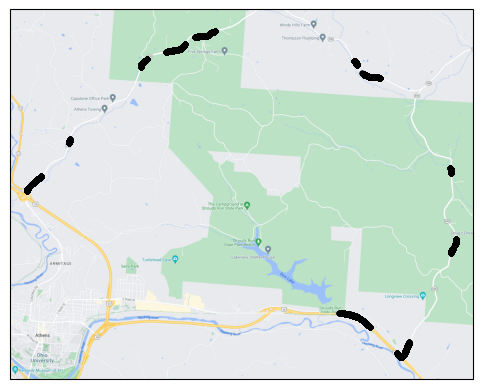

In [25]:
plt.figure( figure = ( 8, 8 ) )

#

minLat = min( df[ 'latitude' ] )

maxLat = max( df[ 'latitude' ] )

minLon = min( df[ 'longitude' ] )

maxLon = max( df[ 'longitude' ] )

expansion_coeff = 0.005

#

street_map = GoogleTiles( style = 'street' )

ax = plt.axes( projection = street_map.crs )

#

ax.set_extent( [ minLon - expansion_coeff , maxLon + expansion_coeff, minLat - expansion_coeff, maxLat + expansion_coeff ], ccrs.PlateCarree() )

ax.add_image( street_map, 14 )

#

lat_list = df[ 'latitude' ]

lon_list = df[ 'longitude' ]

plt.plot( lon_list, lat_list, transform = ccrs.PlateCarree(), marker = '.', ls = '', color = 'black' )

# plt.legend()

plt.show()

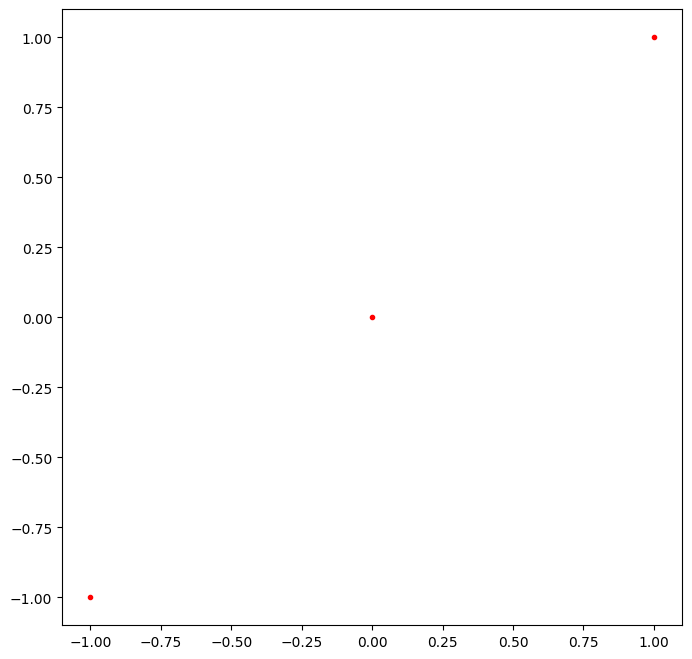

In [12]:
plt.figure( figsize = ( 8, 8 ) )

plt.plot( [ -1, 0, 1 ], [ -1, 0, 1 ], c = 'red', marker = '.', ls = '' )

plt.show()